# **Dimensionality Reduction**

### **Pengurangan dimensi adalah proses pengurangan jumlah variabel atau atribut acak yang sedang dipertimbangkan. Reduksi data berdimensi tinggi, sebagai bagian dari langkah pra-pemrosesan data, sangat penting dalam banyak aplikasi dunia nyata. Pengurangan dimensi tinggi telah muncul sebagai salah satu tugas penting dalam aplikasi data mining. Misalnya, Anda mungkin memiliki kumpulan data dengan ratusan fitur (kolom di database Anda). Kemudian reduksi dimensionalitas adalah Anda mengurangi fitur atribut data tersebut dengan menggabungkan atau menggabungkannya sedemikian rupa sehingga tidak akan kehilangan banyak karakteristik signifikan dari dataset asli. Salah satu masalah utama yang terjadi dengan data berdimensi tinggi secara luas dikenal sebagai "Curse of Dimensionality". Ini mendorong kami untuk mengurangi dimensi data kami jika kami ingin menggunakannya untuk analisis.**


## **Import Library & Dataset**

#### **Sumber Dataset: https://www.kaggle.com/brsdincer/star-type-classification**

In [273]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [274]:
os.environ['KAGGLE_USERNAME'] = "akmalzuhdyprasetya"
os.environ['KAGGLE_KEY'] = "3f1fd1ffa5d36294293dfb098b3b7392"

In [275]:
!kaggle datasets download -d brsdincer/star-type-classification

star-type-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [276]:
!unzip -q /content/star-type-classification.zip

replace Stars.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [277]:
data = pd.read_csv("/content/Stars.csv")
data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


## **Pre-Processing**

In [278]:
data["Type"].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Type, dtype: int64

In [279]:
cleanup_nums = {"Type": {0:0.0, 1:1.0, 2:2.0, 3:3.0, 4:4.0, 5:5.0}}
data.replace(cleanup_nums, inplace=True)
data.head(21)
data.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type              float64
dtype: object

In [280]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Color'] = le.fit_transform(data['Color'])
data['Spectral_Class'] = le.fit_transform(data['Spectral_Class'])

In [281]:
x = data.drop("Type", 1)
y = data["Type"]
column_name = list(x.columns)
print(x)

     Temperature              L          R    A_M  Color  Spectral_Class
0           3068       0.002400     0.1700  16.12      8               5
1           3042       0.000500     0.1542  16.60      8               5
2           2600       0.000300     0.1020  18.70      8               5
3           2800       0.000200     0.1600  16.65      8               5
4           1939       0.000138     0.1030  20.06      8               5
..           ...            ...        ...    ...    ...             ...
235        38940  374830.000000  1356.0000  -9.93      0               6
236        30839  834042.000000  1194.0000 -10.63      0               6
237         8829  537493.000000  1423.0000 -10.73      9               0
238         9235  404940.000000  1112.0000 -11.23      9               0
239        37882  294903.000000  1783.0000  -7.80      0               6

[240 rows x 6 columns]


In [282]:
data.describe()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,5.766667,3.758333,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,4.208446,2.090007,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,1.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,8.000000,5.000000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,8.000000,5.000000,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,16.000000,6.000000,5.000000


In [283]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(x)

In [284]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1.]


In [285]:
data_new = pd.DataFrame(data=data_scaled, columns= column_name)
data_new.head(11)

,Temperature,L,R,A_M,Color,Spectral_Class
0,0.029663,2.731275e-09,0.000083,0.876798,0.5,0.833333
1,0.028980,4.944550e-10,0.000075,0.891807,0.5,0.833333
2,0.017367,2.590003e-10,0.000048,0.957473,0.5,0.833333
3,0.022622,1.412729e-10,0.000078,0.893371,0.5,0.833333
4,0.000000,6.828189e-11,0.000049,1.000000,0.5,0.833333
5,0.023673,6.710461e-10,0.000052,0.903690,0.5,0.833333
6,0.018339,7.652280e-10,0.000061,0.911194,0.5,0.833333
7,0.017367,3.767276e-10,0.000045,0.916823,0.5,0.833333
8,0.018681,7.181371e-10,0.000052,0.918386,0.5,0.833333
9,0.019994,1.177274e-10,0.000062,0.874609,0.5,0.833333


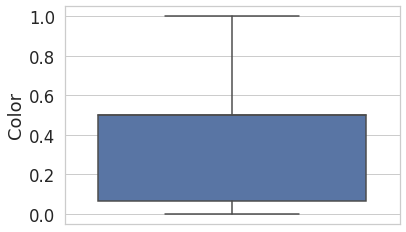

In [286]:
import seaborn as sns
sns.boxplot(y = data_new['Color'])

In [287]:
data_new = pd.concat([data_new, y], axis = 1)
data_new.head(11)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,0.029663,2.731275e-09,0.000083,0.876798,0.5,0.833333,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0.5,0.833333,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0.5,0.833333,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0.5,0.833333,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0.5,0.833333,0.0
5,0.023673,6.710461e-10,0.000052,0.903690,0.5,0.833333,0.0
6,0.018339,7.652280e-10,0.000061,0.911194,0.5,0.833333,0.0
7,0.017367,3.767276e-10,0.000045,0.916823,0.5,0.833333,0.0
8,0.018681,7.181371e-10,0.000052,0.918386,0.5,0.833333,0.0
9,0.019994,1.177274e-10,0.000062,0.874609,0.5,0.833333,0.0


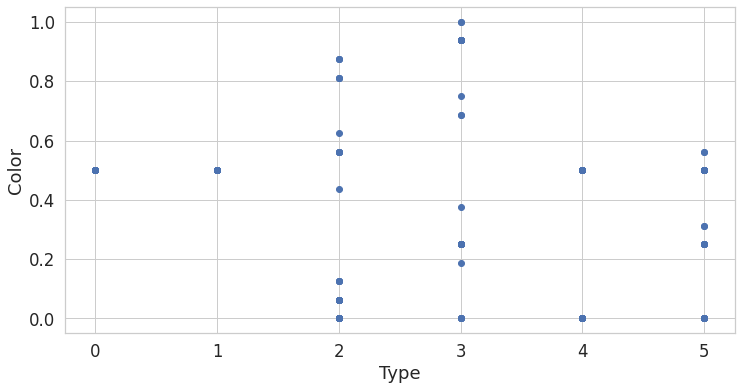

In [288]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data_new['Type'], data_new['Color'])
ax.set_xlabel('Type')
ax.set_ylabel('Color')
plt.show()

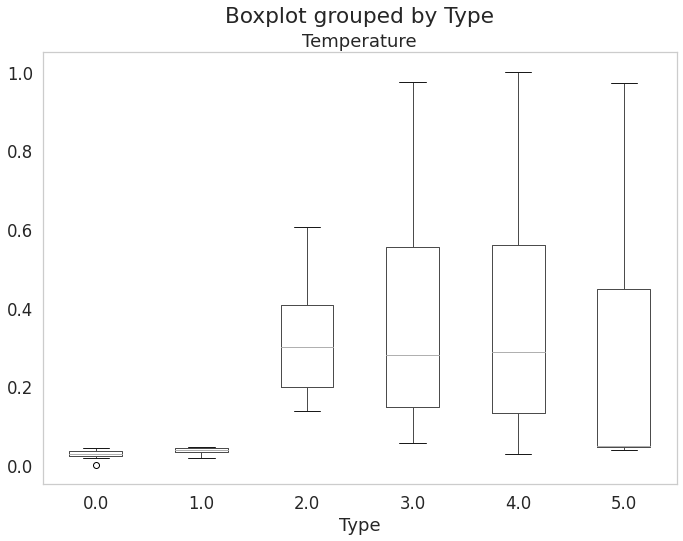

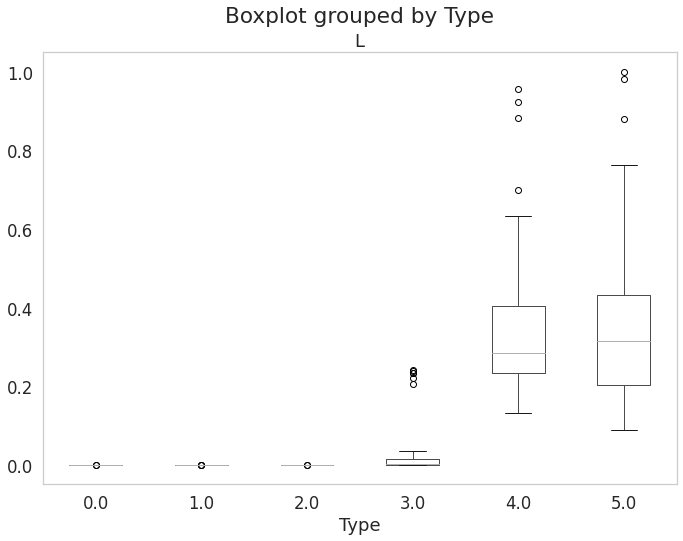

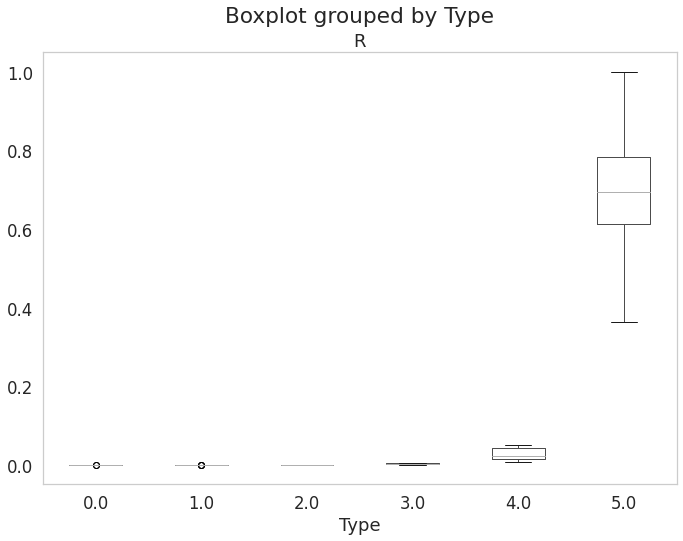

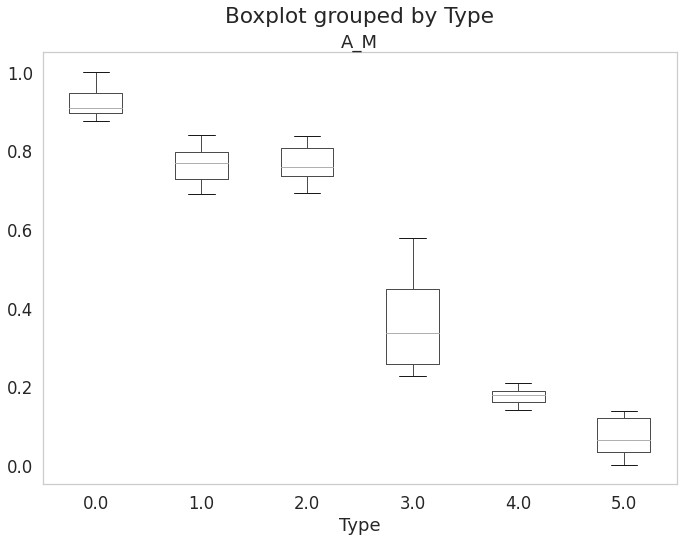

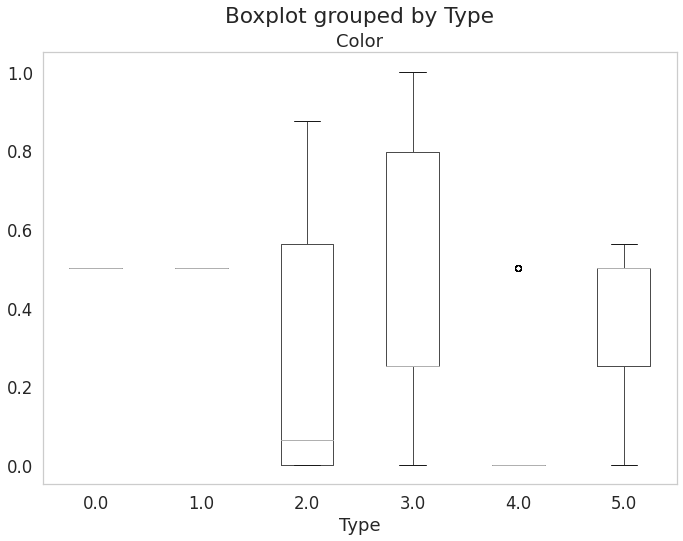

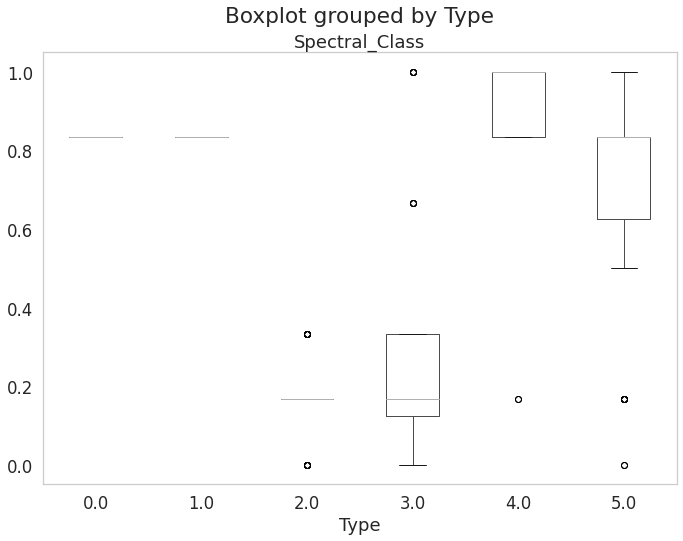

In [289]:
sns.set(rc={'figure.figsize':(11, 8)}, font_scale=1.5, style='whitegrid')

x = data_new.drop("Type", 1)
columns_name = list(x.columns)

for i in column_name:
  data_new.boxplot(by ='Type', column =[i], grid = False) 
  

In [290]:
Q1 = data_new.quantile(0.25)
Q3 = data_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data_new.shape

Temperature       0.307697
L                 0.233159
R                 0.021887
A_M               0.623202
Color             0.437500
Spectral_Class    0.666667
Type              3.000000
dtype: float64


(240, 7)

In [291]:
data_out = data_new[~((data_new < (Q1 - 1.5 * IQR)) |(data_new > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_out.shape)

(188, 7)


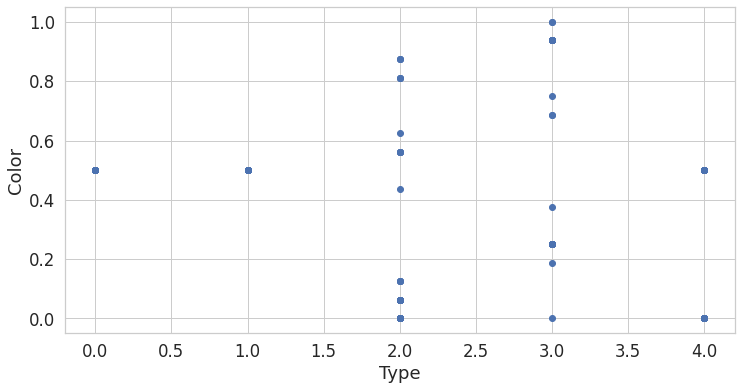

In [292]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data_out['Type'], data_out['Color'])
ax.set_xlabel('Type')
ax.set_ylabel('Color')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

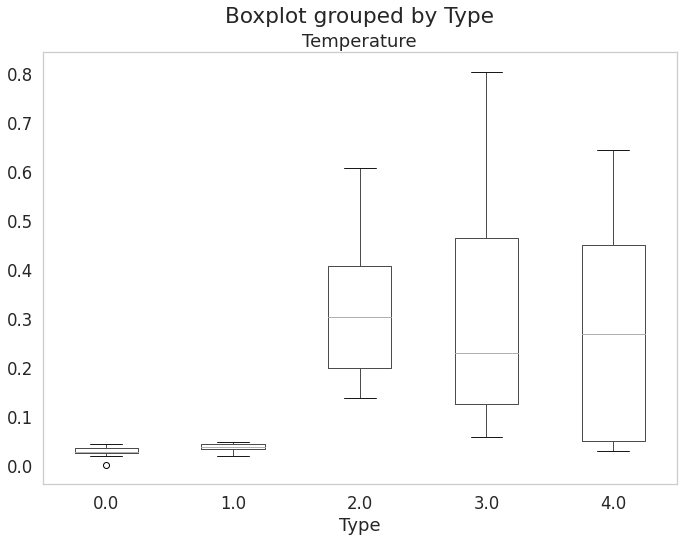

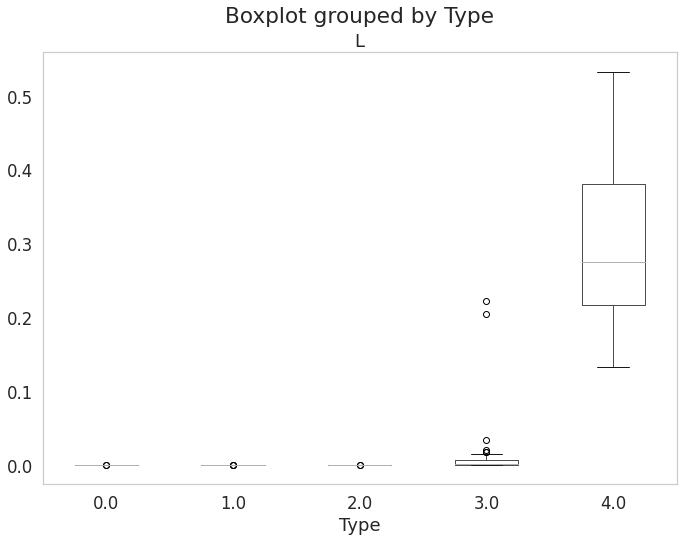

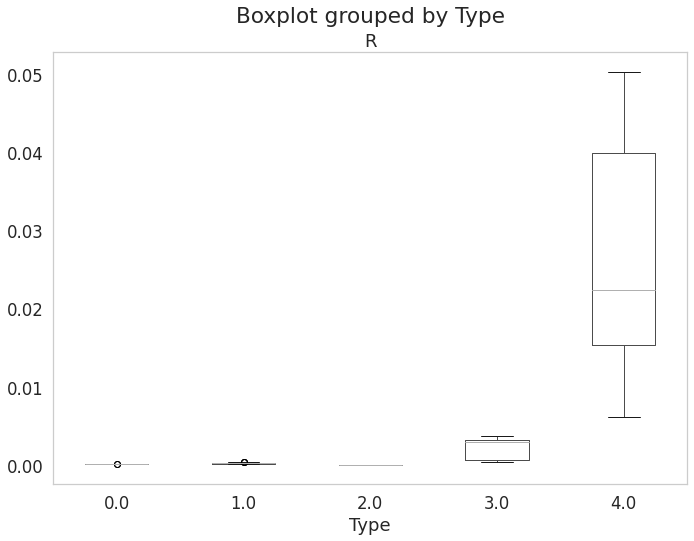

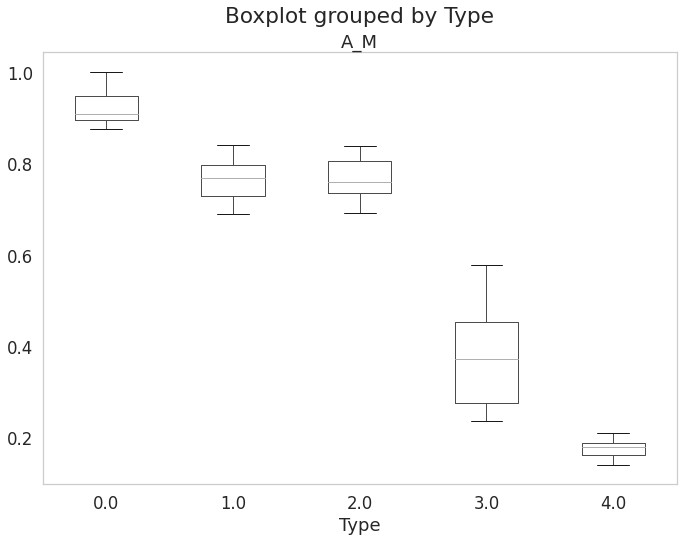

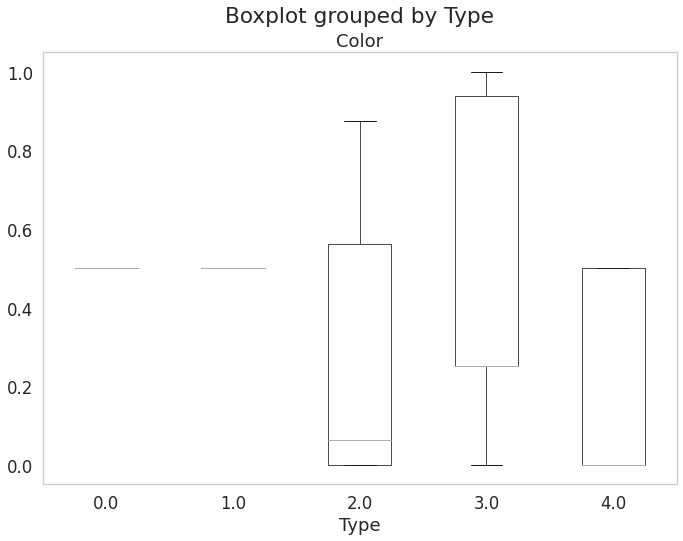

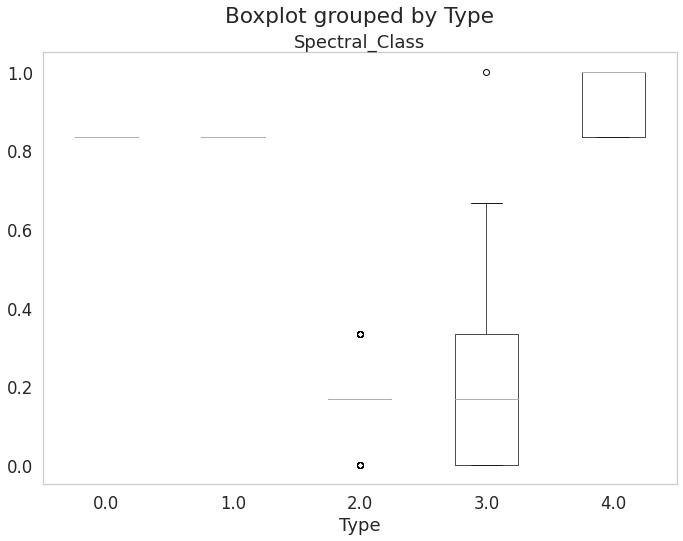

In [293]:
x_fix = data_out.drop("Type", 1)
y_fix = data_out["Type"]
columns_name = list(x_fix.columns)

for i in column_name:
  data_out.boxplot(by ='Type', column =[i], grid = False)
  

## **Feature Selection**

### **1. Univariate Selection**

<img src='https://drive.google.com/uc?id=1g7jNdIy6QiW-oMgc1y3Q3LTSB-k3eYL2'>

In [294]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = data_out.iloc[:,0:6]  # independent columns
y = data_out.iloc[:,-1]   # target column 

bestfeatures = SelectKBest(score_func=chi2, k=6)

fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
p_values = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(x_fix.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, p_values],axis=1)
featureScores.columns = ['Feature','chi-square Score', 'p-values']  # naming the dataframe columns
print(featureScores.nlargest(6,'chi-square Score'))  # print ranked best features

          Feature  chi-square Score      p-values
1               L         41.153074  2.498649e-08
5  Spectral_Class         33.936310  7.679401e-07
3             A_M         22.214227  1.816697e-04
0     Temperature         18.229678  1.112845e-03
4           Color         10.445953  3.354968e-02
2               R          3.631822  4.581195e-01


### **2. SVM-RFE**

In [295]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [296]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from operator import itemgetter

x = data_out.iloc[:,0:6]
y = data_out.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    stratify = y)

colnames = x.columns
n_features_to_select = 1
svclassifier = SVC(kernel='linear')
rfe = RFE(svclassifier, n_features_to_select, verbose = 1)
rfe.fit(x, y)

y_pred = rfe.predict(x)

ranks[f"RFE score"] = ranking(list(map(float, rfe.ranking_)), colnames, 
                              order=-1)

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [297]:
# Put the mean scores into a Pandas dataframe
data_rank = pd.DataFrame(list(ranks[f"RFE score"].items()), columns= ['Feature','Scores'])

# Sort the dataframe
data_rank = data_rank.sort_values('Scores', ascending=False)

In [298]:
data_rank

,Feature,Scores
3,A_M,1.0
5,Spectral_Class,0.8
0,Temperature,0.6
4,Color,0.4
1,L,0.2
2,R,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


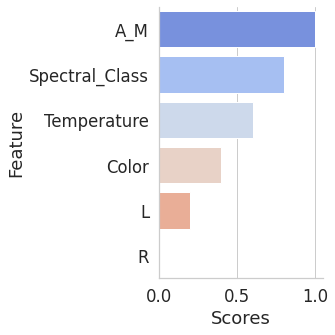

In [299]:
sns.factorplot(x="Scores", y="Feature", data = data_rank, kind="bar", size=5, 
               aspect=1, palette='coolwarm')

### **3. Extratrees**

In [300]:
from sklearn.ensemble import ExtraTreesClassifier

[0.07809827 0.09840705 0.2055993  0.33903766 0.08690715 0.19195056]


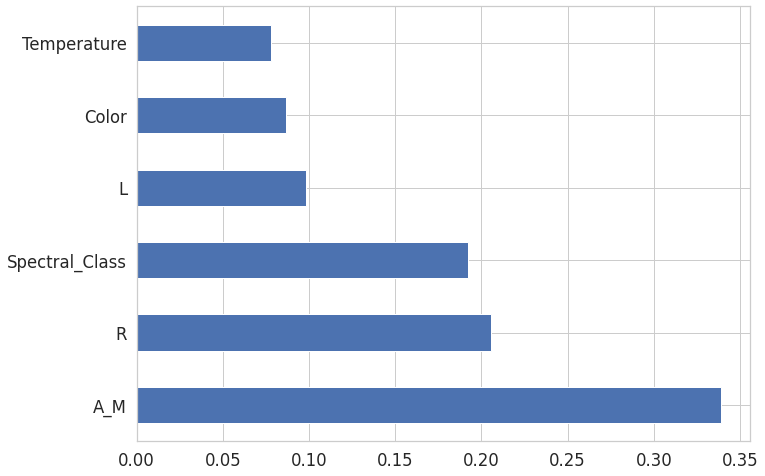

In [301]:
model = ExtraTreesClassifier()
model.fit(x_fix,y_fix)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

### **4. Correlation Matrix with Heatmap**

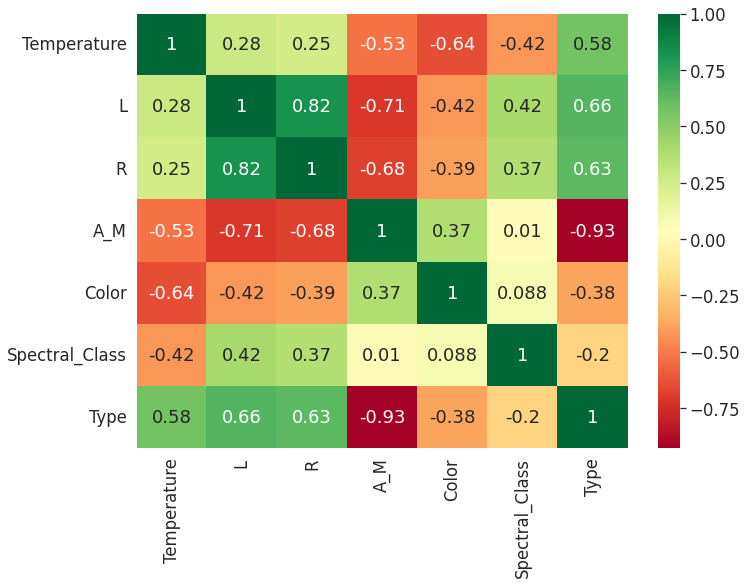

In [302]:
x = data_out.iloc[:,0:8]  # independent columns
y = data_out.iloc[:,-1]    # target column

corrmat = data_out.corr()
top_corr_features = corrmat.index
# plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(data_out[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## **Feature Extraction**

### **1. LDA**

In [303]:
from sklearn import manifold, datasets, decomposition, discriminant_analysis

lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(x, y)

lda_data = pd.DataFrame(data = lda, columns = ['new_var1', 'new_var2'])
finalData = pd.concat([lda_data, y_fix], axis = 1)
finalData.head(11)

,new_var1,new_var2,Type
0,-4.028459,-3.046321,0.0
1,-4.339476,-3.112439,0.0
2,-5.659834,-3.438407,0.0
3,-4.342571,-3.146029,0.0
4,-6.468529,-3.691579,0.0
5,-4.564296,-3.184625,0.0
6,-4.696125,-3.239091,0.0
7,-4.809984,-3.266647,0.0
8,-4.848460,-3.267839,0.0
9,-3.938749,-3.077588,0.0


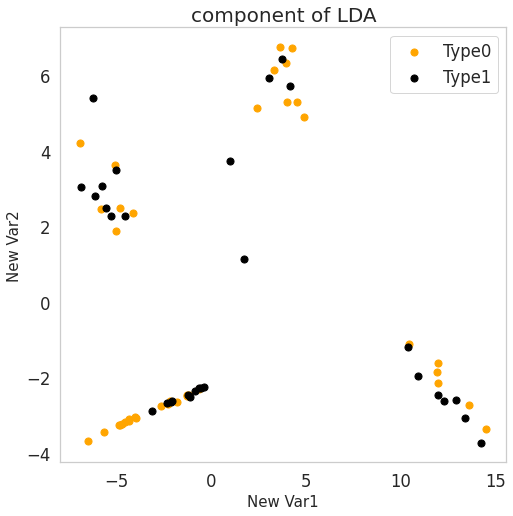

In [304]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('New Var1', fontsize = 15)
ax.set_ylabel('New Var2', fontsize = 15)
ax.set_title('component of LDA', fontsize = 20)
targets = [0.0, 1.0]
colors = ['orange', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = finalData['Type'] == target
    ax.scatter(finalData.loc[indicesToKeep, 'new_var1']
               , finalData.loc[indicesToKeep, 'new_var2']
               , c = color
               , s = 50)
ax.legend(["Type0", "Type1"])
ax.grid()

### **2. PCA**

In [305]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_fix)
principalData = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalData = pd.concat([principalData, y_fix], axis = 1)
finalData.head(11)

,principal component 1,principal component 2,Type
0,-0.380385,-0.072212,0.0
1,-0.386400,-0.080482,0.0
2,-0.416408,-0.118003,0.0
3,-0.389720,-0.082319,0.0
4,-0.440060,-0.143830,0.0
5,-0.393203,-0.087770,0.0
6,-0.398349,-0.092679,0.0
7,-0.400912,-0.095892,0.0
8,-0.400945,-0.096538,0.0
9,-0.383693,-0.072523,0.0


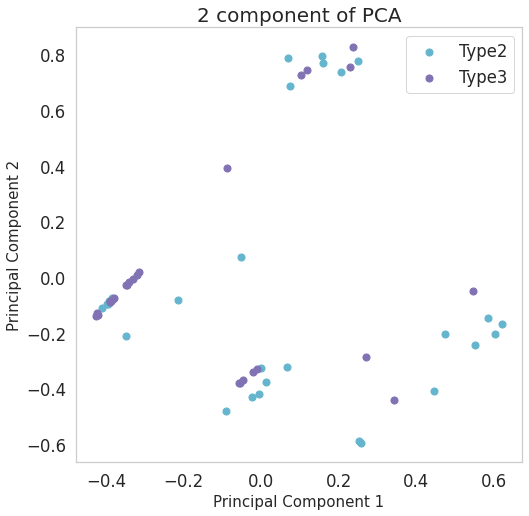

In [306]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component of PCA', fontsize = 20)
targets = [2.0, 3.0]
colors = ['c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalData['Type'] == target
    ax.scatter(finalData.loc[indicesToKeep, 'principal component 1']
               , finalData.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["Type2", "Type3"])
ax.grid()

### **3. t-SNE**

In [307]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [308]:
x_2d = tsne.fit_transform(x_fix)

In [309]:
x_2d

array([[ 10.775083  ,   1.2628622 ],
       [ 11.420237  ,   1.5639579 ],
       [ 13.852415  ,   3.2677474 ],
       [ 11.229586  ,   2.0797834 ],
       [ 14.4820385 ,   3.8900383 ],
       [ 11.765959  ,   2.3342392 ],
       [ 12.05339   ,   2.673248  ],
       [ 12.359558  ,   2.7463517 ],
       [ 12.489676  ,   2.7271252 ],
       [ 10.524278  ,   1.4989662 ],
       [  2.2497084 ,  -2.9572957 ],
       [  3.2241561 ,  -2.4619238 ],
       [  4.839768  ,  -1.8037505 ],
       [  2.4590805 ,  -3.487052  ],
       [  3.0960522 ,  -2.2301395 ],
       [  4.5381565 ,  -1.6594473 ],
       [  6.6286125 ,  -0.85126835],
       [  2.708652  ,  -3.4170833 ],
       [  5.185736  ,  -1.5194746 ],
       [  2.9818158 ,  -3.2113829 ],
       [-12.457799  ,   8.634609  ],
       [ -4.0796533 ,   4.9049244 ],
       [ -2.9502223 ,   4.9680624 ],
       [ -4.081085  ,   4.913257  ],
       [-11.71576   ,   7.8303313 ],
       [ -2.5750813 ,   4.0029926 ],
       [-10.992503  ,   6.4702334 ],
 

In [310]:
new_data = pd.DataFrame(data = x_2d, columns = ['feature 1', 'feature 2'])
tsne_data = pd.concat([new_data, y_fix], axis = 1)
tsne_data.head(11)

,feature 1,feature 2,Type
0,10.775083,1.262862,0.0
1,11.420237,1.563958,0.0
2,13.852415,3.267747,0.0
3,11.229586,2.079783,0.0
4,14.482038,3.890038,0.0
5,11.765959,2.334239,0.0
6,12.053390,2.673248,0.0
7,12.359558,2.746352,0.0
8,12.489676,2.727125,0.0
9,10.524278,1.498966,0.0


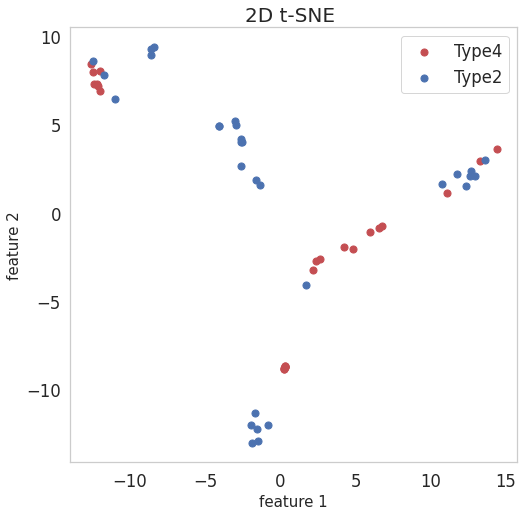

In [311]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 1', fontsize = 15)
ax.set_ylabel('feature 2', fontsize = 15)
ax.set_title('2D t-SNE ', fontsize = 20)
targets = [4.0, 2.0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_data['Type'] == target
    ax.scatter(tsne_data.loc[indicesToKeep, 'feature 1']
               , tsne_data.loc[indicesToKeep, 'feature 2']
               , c = color
               , s = 50)
ax.legend(["Type4", "Type2"])
ax.grid()